In [1]:
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_delta = pd.read_excel(r'/Users/dilianaserafimova/Desktop/Delta_Airlines.xlsx')

In [6]:
df_delta.head()

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
0,2002,10,2002 10,"5,055,393",255.646,"5,311,039","5,379,708","7,635,713",70.45,"64,788"
1,2002,11,2002 11,"4,742,031",241.053,"4,983,084","4,971,506","7,205,672",68.99,"61,138"
2,2002,12,2002 12,"5,166,581",252.903,"5,419,484","5,525,107","7,275,940",75.94,"62,085"
3,2002,TOTAL,2002 TOTAL,"59,937,792","3,250,368","63,188,160","65,230,904","89,739,736",72.69,"823,261"
4,2003,1,2003 1,"4,525,201",224.647,"4,749,848","4,883,578","7,285,372",67.03,"62,999"


## Delete irrelevant data / years / months 

#### Delete irrelevant date

In [7]:
indexNames = df_delta[df_delta['Year'] == 2002].index
df_delta.drop(indexNames , inplace=True)


In [8]:
indexNames = df_delta[df_delta['Year'] == 2020].index
df_delta.drop(indexNames , inplace=True)

In [9]:
indexNames = df_delta[df_delta['Year'] == 2021].index
df_delta.drop(indexNames , inplace=True)

In [10]:
indexNames = df_delta[df_delta['Year'] == 2022].index
df_delta.drop(indexNames , inplace=True)

In [11]:
print(df_delta)

     Year  Month        date flight_domestic  flight_int    pax_count  \
4    2003      1      2003 1       4,525,201     224.647    4,749,848   
5    2003      2      2003 2       4,228,590     186.518    4,415,108   
6    2003      3      2003 3       4,976,856     220.033    5,196,889   
7    2003      4      2003 4       4,457,360     199.412    4,656,772   
8    2003      5      2003 5       4,598,267     231.417    4,829,684   
..    ...    ...         ...             ...         ...          ...   
220  2019      9      2019 9       8,482,166   1,047,410    9,529,576   
221  2019     10     2019 10       9,120,475   1,011,181   10,131,656   
222  2019     11     2019 11       8,338,482     870.304    9,208,786   
223  2019     12     2019 12       8,871,949   1,045,911    9,917,860   
224  2019  TOTAL  2019 TOTAL     105,924,303  12,846,254  118,770,557   

         revenue   seat_miles  load_factor    flights  
4      4,883,578    7,285,372        67.03     62,999  
5      4,39

#### Delete irrelevant content

In [12]:
indexNames = df_delta[df_delta['Month'] == 'TOTAL'].index
df_delta.drop(indexNames , inplace=True)

In [13]:
df_delta.head(20)

,Year,Month,date,flight_domestic,flight_int,pax_count,revenue,seat_miles,load_factor,flights
4,2003,1,2003 1,"4,525,201",224.647,"4,749,848","4,883,578","7,285,372",67.03,"62,999"
5,2003,2,2003 2,"4,228,590",186.518,"4,415,108","4,399,172","6,286,464",69.98,"54,334"
6,2003,3,2003 3,"4,976,856",220.033,"5,196,889","5,223,931","7,131,359",73.25,"61,523"
7,2003,4,2003 4,"4,457,360",199.412,"4,656,772","4,660,313","6,542,917",71.23,"55,024"
8,2003,5,2003 5,"4,598,267",231.417,"4,829,684","4,950,716","6,520,162",75.93,"55,443"
9,2003,6,2003 6,"4,942,610",285.511,"5,228,121","5,563,780","6,769,492",82.19,"57,218"
10,2003,7,2003 7,"5,201,640",284.778,"5,486,418","5,880,555","7,044,643",83.48,"58,965"
11,2003,8,2003 8,"5,125,297",287.758,"5,413,055","5,894,368","7,235,282",81.47,"59,871"
12,2003,9,2003 9,"4,150,183",246.578,"4,396,761","4,776,037","7,071,848",67.54,"57,529"
13,2003,10,2003 10,"4,849,132",251.073,"5,100,205","5,326,522","7,324,601",72.72,"60,206"


#### Delete irrelevant column

In [14]:
df_delta = df_delta.drop(["flight_domestic", "flight_int", 'Year', 'Month'], axis=1)

#### Delete NaN

In [15]:
incomplete_columns = list(df_delta.columns[df_delta.isnull().any()])

In [16]:
incomplete_columns

[]

#### Datensatz ist vollständig

## Convert argument to datetime

In [17]:
df_delta['date'] = pd.to_datetime(df_delta['date'])

In [18]:
df_delta.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,"4,749,848","4,883,578","7,285,372",67.03,"62,999"
5,2003-02-01,"4,415,108","4,399,172","6,286,464",69.98,"54,334"
6,2003-03-01,"5,196,889","5,223,931","7,131,359",73.25,"61,523"
7,2003-04-01,"4,656,772","4,660,313","6,542,917",71.23,"55,024"
8,2003-05-01,"4,829,684","4,950,716","6,520,162",75.93,"55,443"


## Convert data types

In [19]:
df_delta.dtypes

date           datetime64[ns]
pax_count              object
revenue                object
seat_miles             object
load_factor           float64
flights                object
dtype: object

In [20]:
df_delta['pax_count'] = df_delta['pax_count'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2335/2060240494.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_delta['pax_count'] = df_delta['pax_count'].str.replace('[^\w\s]','').astype(int)


In [21]:
df_delta['revenue'] = df_delta['revenue'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2335/1567084121.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_delta['revenue'] = df_delta['revenue'].str.replace('[^\w\s]','').astype(int)


In [22]:
df_delta['seat_miles'] = df_delta['seat_miles'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2335/220658234.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_delta['seat_miles'] = df_delta['seat_miles'].str.replace('[^\w\s]','').astype(int)


In [23]:
df_delta['flights'] = df_delta['flights'].str.replace('[^\w\s]','').astype(int)

/var/folders/_h/_0hrsyw93ljbt2ws9kq8w6z40000gn/T/ipykernel_2335/218922546.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_delta['flights'] = df_delta['flights'].str.replace('[^\w\s]','').astype(int)


In [24]:
df_delta.head()

,date,pax_count,revenue,seat_miles,load_factor,flights
4,2003-01-01,4749848,4883578,7285372,67.03,62999
5,2003-02-01,4415108,4399172,6286464,69.98,54334
6,2003-03-01,5196889,5223931,7131359,73.25,61523
7,2003-04-01,4656772,4660313,6542917,71.23,55024
8,2003-05-01,4829684,4950716,6520162,75.93,55443


In [25]:
df_delta.dtypes

date           datetime64[ns]
pax_count               int64
revenue                 int64
seat_miles              int64
load_factor           float64
flights                 int64
dtype: object

## Date to index

In [26]:
df_delta = df_delta.set_index(['date'])

In [27]:
df_delta.dtypes

pax_count        int64
revenue          int64
seat_miles       int64
load_factor    float64
flights          int64
dtype: object

## Clean data safe 

In [28]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/Delta Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Clean_Data/Delta Airlines


In [29]:
df_delta.to_excel('df_delta_clean.xlsx', index = True)

## Generating rolling means and standard deviations

### Rolling mean

In [29]:
df_delta['pax_count_rolling_mean'] = df_delta['pax_count'].rolling(12).mean()

In [30]:
df_delta['pax_count_rolling_mean']

date
2003-01-01             NaN
2003-02-01             NaN
2003-03-01             NaN
2003-04-01             NaN
2003-05-01             NaN
                  ...     
2019-08-01    9.661563e+06
2019-09-01    9.728018e+06
2019-10-01    9.783422e+06
2019-11-01    9.805525e+06
2019-12-01    9.897546e+06
Name: pax_count_rolling_mean, Length: 204, dtype: float64

### Rolling std

In [31]:
df_delta['pax_count_rolling_std'] = df_delta['pax_count'].rolling(12).std()

### Plot

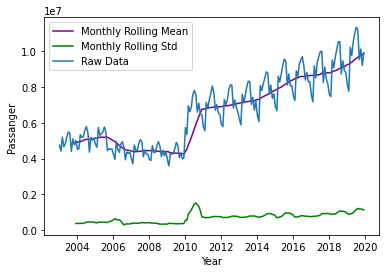

In [32]:
plt.plot(df_delta['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')
plt.plot(df_delta['pax_count_rolling_std'], label = 'Monthly Rolling Std', color = 'green')
plt.plot(df_delta['pax_count'], label='Raw Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Passanger')
plt.show()

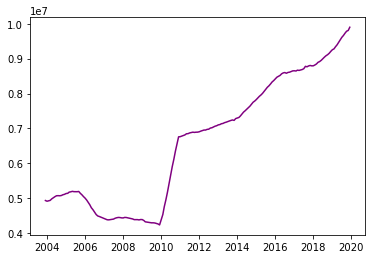

In [33]:
plt.plot(df_delta['pax_count_rolling_mean'], label = 'Monthly Rolling Mean', color = 'purple')

## Seasonal decompose

In [34]:
result=seasonal_decompose(df_delta['pax_count'], model='multiplicable', period=12)

<AxesSubplot:xlabel='date'>

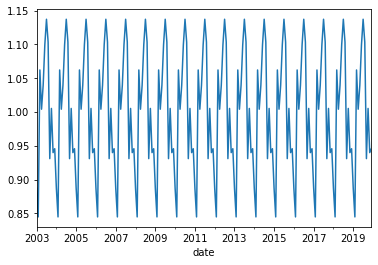

In [35]:
result.seasonal.plot()

<AxesSubplot:xlabel='date'>

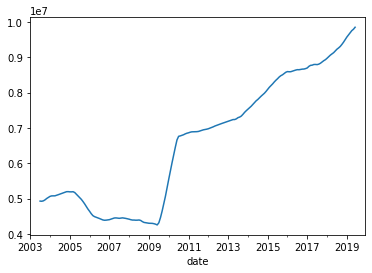

In [36]:
result.trend.plot()

<AxesSubplot:xlabel='date'>

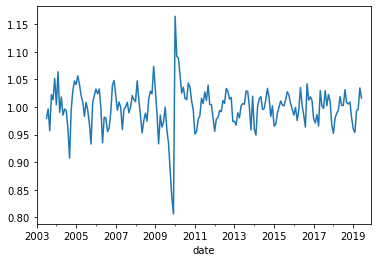

In [37]:
result.resid.plot()

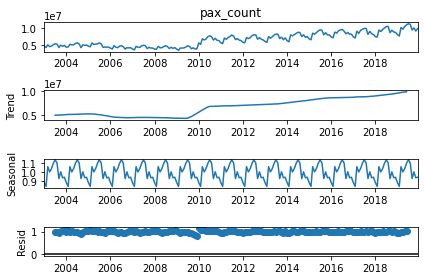

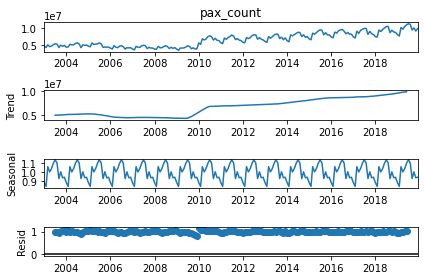

In [38]:
result.plot()